In [2]:
# import tools

import cv2
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import numpy as np 

In [7]:
# load battery image

btr = cv2.imread('data/images/sample_image.png')

btr_rgb = cv2.cvtColor(btr,cv2.COLOR_BGR2RGB)
btr_gry = cv2.cvtColor(btr,cv2.COLOR_BGR2GRAY)

wb,hb,cb = btr.shape
btr_blank = np.zeros((wb,hb,cb),np.uint8) 
btr_blank1 = np.zeros_like(btr,np.uint8) # same as above

In [8]:
threshold, btr_thr = cv2.threshold(btr_gry,150,255,cv2.THRESH_BINARY)

# find the contours of the can and display

contours_can,hierarchy = cv2.findContours(btr_thr,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

contours_can = sorted(contours_can, key=cv2.contourArea, reverse=True)

# declare the variables of the inner and outer diameter of the can

otr, inn = contours_can[0], contours_can[1]

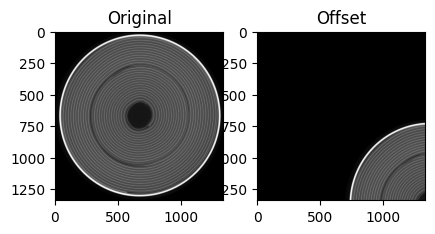

In [9]:
# transform the image, move it

def translation(image, x:int, y:int):
    trn_mtr = np.float32([[1,0,x],[0,1,y]])
    dmn = (image.shape[1],image.shape[0])
    return cv2.warpAffine(image, trn_mtr, dmn)

btr_off = translation(btr_rgb, 700, 700)

plt.figure(figsize=(10,10))
plt.subplot(1,4,1)
plt.title("Original")
plt.imshow(btr_rgb)

plt.subplot(1,4,2)
plt.title("Offset")
plt.imshow(btr_off)

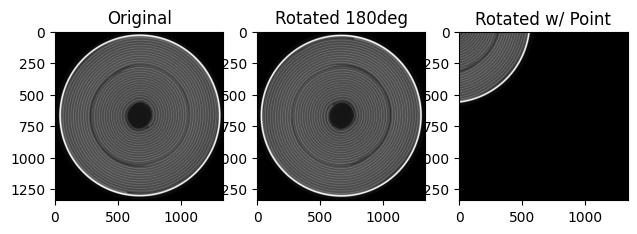

In [10]:
# rotate battery image

def rotate(img, ang, rtt_pnt=None):
    height, width = img.shape[0], img.shape[1]
    pnt = (height//2, width//2) if not rtt_pnt else rtt_pnt
    trn_mtr = cv2.getRotationMatrix2D(pnt, ang, 1.0)
    dmn = (height, width)
    return cv2.warpAffine(img, trn_mtr, dmn)

btr_rtt = rotate(btr_rgb, 180)

btr_rtt_pnt = rotate(btr_rgb, 180, (300, 300))

plt.figure(figsize=(10,10))
plt.subplot(1,4,1)
plt.title("Original")
plt.imshow(btr_rgb)

plt.subplot(1,4,2)
plt.title("Rotated 180deg")
plt.imshow(btr_rtt)

plt.subplot(1,4,3)
plt.title("Rotated w/ Point")
plt.imshow(btr_rtt_pnt)

46 40 1254 1260
[[   0.    0.]
 [   0. 1214.]
 [1214.    0.]
 [1214. 1214.]]


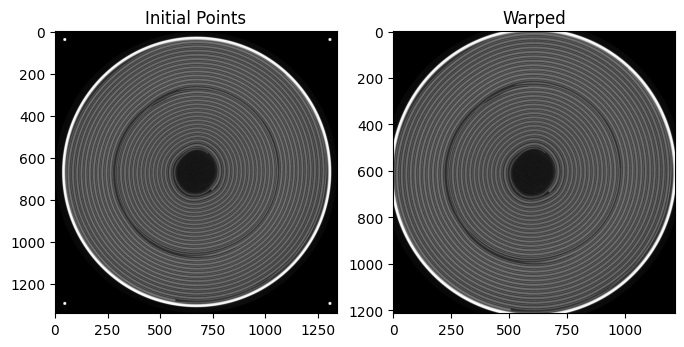

In [11]:
# apply perspective shift to image
x,y,w,h = cv2.boundingRect(inn)

print(x,y,w,h)

points_A = np.float32([[x,y], [x,y+w], [x+h,y], [x+h,y+w]])

points_B = np.float32([[0,0], [0,w-y], [h-x,0], [h-x,w-y]]) 

print(points_B)

btr_drw = btr.copy()
for pnt in points_A:
    center = (int(pnt[0]), int(pnt[1]))
    cv2.circle(btr_drw,center,2,(255,255,255),10)

M = cv2.getPerspectiveTransform(points_A, points_B)


btr_wrp = cv2.warpPerspective(btr, M, (h-x,w-y))

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.title("Initial Points")
plt.imshow(btr_drw, cmap="gray")

plt.subplot(1,2,2)
plt.title("Warped")
plt.imshow(btr_wrp, cmap='gray')
